In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import dateutil.parser

> First, I made a mistake naming the data set! **It's 2015 data, not 2014 data.** But yes, still use `311-2014.csv`. You can rename it.

# Importing and preparing your data

Import your data, but **only the first 200,000 rows**. You'll also want to change the index to be a datetime based on the **Created Date** column - you'll want to check if it's already a datetime, and parse it if not.

In [2]:
df = pd.read_csv("311-2015.csv", nrows=200000)
df.head()

/usr/local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (8,17,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31015465,07/06/2015 10:58:27 AM,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,NaN,11360,27-16 203 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.773540,-73.788237,"(40.773539552542, -73.78823697228408)"
1,30997660,07/03/2015 01:26:29 PM,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.767021,-73.979448,"(40.76702142171206, -73.97944780718524)"
2,31950223,11/09/2015 03:55:09 AM,11/09/2015 08:08:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10453,1993 GRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.852671,-73.910608,"(40.85267061877697, -73.91060771362552)"
3,31000038,07/03/2015 02:18:32 AM,07/03/2015 07:54:48 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11372,84-16 NORTHERN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.755774,-73.883262,"(40.755773786469966, -73.88326243225418)"
4,30995614,07/04/2015 12:03:27 AM,07/04/2015 03:33:09 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11216,1057 BERGEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.676175,-73.951269,"(40.67617516102934, -73.9512690004692)"


In [3]:
def parse_date(str_date):
    return dateutil.parser.parse(str_date)
df['created_datetime'] = df['Created Date'].apply(parse_date)
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_datetime
0,31015465,07/06/2015 10:58:27 AM,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,NaN,11360,27-16 203 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.773540,-73.788237,"(40.773539552542, -73.78823697228408)",2015-07-06 10:58:27
1,30997660,07/03/2015 01:26:29 PM,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,40.767021,-73.979448,"(40.76702142171206, -73.97944780718524)",2015-07-03 13:26:29
2,31950223,11/09/2015 03:55:09 AM,11/09/2015 08:08:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10453,1993 GRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.852671,-73.910608,"(40.85267061877697, -73.91060771362552)",2015-11-09 03:55:09
3,31000038,07/03/2015 02:18:32 AM,07/03/2015 07:54:48 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11372,84-16 NORTHERN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.755774,-73.883262,"(40.755773786469966, -73.88326243225418)",2015-07-03 02:18:32
4,30995614,07/04/2015 12:03:27 AM,07/04/2015 03:33:09 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11216,1057 BERGEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.676175,-73.951269,"(40.67617516102934, -73.9512690004692)",2015-07-04 00:03:27


In [4]:
df.index = df['created_datetime']
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_datetime
created_datetime,,,,,,,,,,,,,,,,,,,,,
2015-07-06 10:58:27,31015465,07/06/2015 10:58:27 AM,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,NaN,11360,27-16 203 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.773540,-73.788237,"(40.773539552542, -73.78823697228408)",2015-07-06 10:58:27
2015-07-03 13:26:29,30997660,07/03/2015 01:26:29 PM,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,40.767021,-73.979448,"(40.76702142171206, -73.97944780718524)",2015-07-03 13:26:29
2015-11-09 03:55:09,31950223,11/09/2015 03:55:09 AM,11/09/2015 08:08:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10453,1993 GRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.852671,-73.910608,"(40.85267061877697, -73.91060771362552)",2015-11-09 03:55:09
2015-07-03 02:18:32,31000038,07/03/2015 02:18:32 AM,07/03/2015 07:54:48 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11372,84-16 NORTHERN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.755774,-73.883262,"(40.755773786469966, -73.88326243225418)",2015-07-03 02:18:32
2015-07-04 00:03:27,30995614,07/04/2015 12:03:27 AM,07/04/2015 03:33:09 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11216,1057 BERGEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.676175,-73.951269,"(40.67617516102934, -73.9512690004692)",2015-07-04 00:03:27


What was the **most popular type of complaint**, and how many times was it filed?

In [5]:
df['Complaint Type'].value_counts().head(1)

Blocked Driveway    21779
Name: Complaint Type, dtype: int64

Make a horizontal bar graph of the **top 5 most frequent complaint types**.

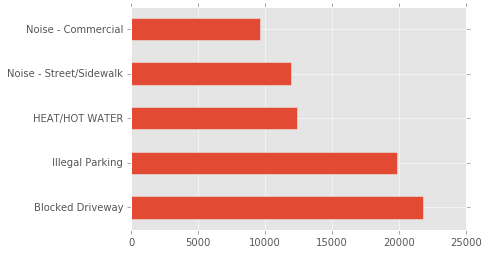

In [6]:
df['Complaint Type'].value_counts().sort_values(ascending=False).head(5).plot(kind='barh')

Which borough has the **most complaints per capita?** Since it's only 5 boroughs, you can do the math manually.

In [7]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [8]:
bronx_pop = 1418733
brooklyn_pop = 2592149
manhattan_pop = 1626159
queens_pop = 2296175
staten_island_pop = 472621

In [9]:
df['Borough'].value_counts()

BROOKLYN         57129
QUEENS           46824
MANHATTAN        42050
BRONX            29610
Unspecified      17000
STATEN ISLAND     7387
Name: Borough, dtype: int64

In [10]:
bronx_complaints = 29610 / bronx_pop
bronx_complaints

0.020870734662547498

In [11]:
brooklyn_complaints = 57129 / brooklyn_pop
brooklyn_complaints

0.022039242342936305

In [12]:
manhattan_complaints = 42050 / manhattan_pop
manhattan_complaints

0.02585848001333203

In [13]:
queens_complaints = 2296175 / queens_pop
queens_complaints

1.0

In [14]:
staten_island_complaints = 7387 / staten_island_pop
staten_island_complaints

0.01562985986657385

According to your selection of data, **how many cases were filed in March?** How about May?

In [15]:
len(df['2015-3'])

15025

In [16]:
len(df['2015-5'])

49715

I'd like to see all of the 311 complaints **called in on April 1st.**

> **Surprise!** We couldn't do this in class, but it was just a limitation of our data set

In [17]:
df['2015-04-01']

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_datetime
created_datetime,,,,,,,,,,,,,,,,,,,,,
2015-04-01 21:37:42,30311691,04/01/2015 09:37:42 PM,04/01/2015 10:49:33 PM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11234,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.609810,-73.922498,"(40.60980966645303, -73.92249759633725)",2015-04-01 21:37:42
2015-04-01 23:12:04,30307701,04/01/2015 11:12:04 PM,04/01/2015 11:32:40 PM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11205,700 MYRTLE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.694644,-73.955504,"(40.694643700748486, -73.95550356170298)",2015-04-01 23:12:04
2015-04-01 13:10:35,30313389,04/01/2015 01:10:35 PM,04/07/2015 04:01:08 PM,DPR,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,Street,11422,245-16 149 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.653016,-73.738626,"(40.653016256598534, -73.73862588133056)",2015-04-01 13:10:35
2015-04-01 17:37:38,30314393,04/01/2015 05:37:38 PM,04/03/2015 11:40:54 AM,DPR,Department of Parks and Recreation,Maintenance or Facility,Hours of Operation,Park,11211,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-01 17:37:38
2015-04-01 12:32:40,30309207,04/01/2015 12:32:40 PM,04/17/2015 01:06:49 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Installation/Work Quality,NaN,11423,90-71 198 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.714299,-73.761158,"(40.71429859671565, -73.76115807774032)",2015-04-01 12:32:40
2015-04-01 18:44:50,30311759,04/01/2015 06:44:50 PM,06/24/2015 11:27:00 AM,DPR,Department of Parks and Recreation,Damaged Tree,Entire Tree Has Fallen Down,Street,10467,862 EAST 213 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.878028,-73.860237,"(40.87802828144708, -73.86023734606933)",2015-04-01 18:44:50
2015-04-01 16:30:15,30309690,04/01/2015 04:30:15 PM,04/01/2015 11:27:22 PM,NYPD,New York City Police Department,Animal Abuse,Neglected,Residential Building/House,11368,107-15 NORTHERN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.757811,-73.861677,"(40.757811195752154, -73.86167714731972)",2015-04-01 16:30:15
2015-04-01 09:04:07,30307990,04/01/2015 09:04:07 AM,04/06/2015 09:17:10 AM,DOF,Senior Citizen Rent Increase Exemption Unit,SCRIE,Miscellaneous,Senior Address,10027,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-01 09:04:07
2015-04-01 07:46:58,30308253,04/01/2015 07:46:58 AM,04/01/2015 09:32:31 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11370,32-51 80 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.756412,-73.887405,"(40.75641194675221, -73.88740503059863)",2015-04-01 07:46:58


What was the most popular type of complaint on April 1st?

In [18]:
# TA-COMMENT: It's probably a good idea to sort this before doing .head()
df['2015-04-01']['Complaint Type'].value_counts().head(1)

Illegal Parking    67
Name: Complaint Type, dtype: int64

What were the **most popular three types of complaint** on April 1st

In [19]:
df['2015-04-01']['Complaint Type'].value_counts().head(3)

Illegal Parking     67
Street Condition    64
Blocked Driveway    58
Name: Complaint Type, dtype: int64

**What month has the most reports filed?** How many? Graph it.

In [20]:
df.resample('M').count().sort_values('Created Date', ascending=False).head(1)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_datetime
created_datetime,,,,,,,,,,,,,,,,,,,,,
2015-05-31,49715,49715,47090,49715,49715,49715,49287,42564,42611,36206,...,303,301,393,33,17,45,41381,41381,41381,49715


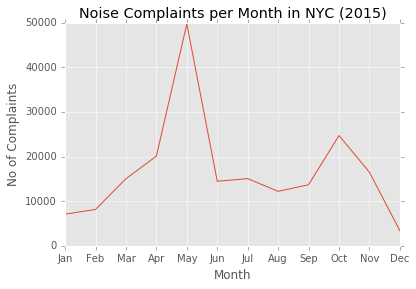

In [21]:
ax = df.groupby(by=df.index.month).count().plot(y='Created Date', legend=False)
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_xlabel("Month")
ax.set_ylabel("No of Complaints")
ax.set_title("Noise Complaints per Month in NYC (2015)")

**What week of the year has the most reports filed?** How many? Graph the weekly complaints.

In [22]:
df.resample('W').count().sort_values('Created Date', ascending=False).head(1)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_datetime
created_datetime,,,,,,,,,,,,,,,,,,,,,
2015-05-10,13559,13559,13073,13559,13559,13559,13472,11750,11830,10243,...,82,82,98,9,2,10,11575,11575,11575,13559


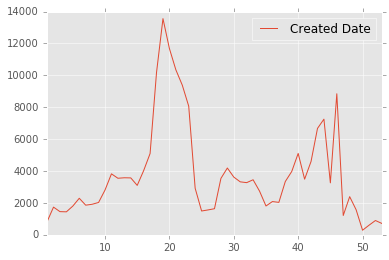

In [23]:
df.groupby(by=df.index.week).count().plot(y='Created Date')

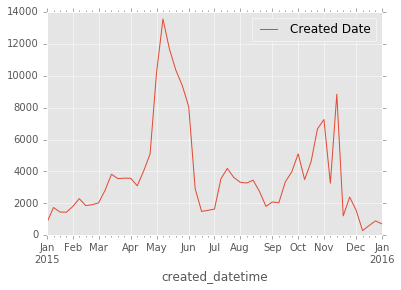

In [24]:
df.resample('W').count().plot(y='Created Date')

Noise complaints are a big deal. Use `.str.contains` to select noise complaints, and make an chart of when they show up annually. **Then** make a chart about when they show up every day (cyclic).

In [25]:
noise_complaints = df[df['Complaint Type'].str.contains('Noise')]
noise_complaints.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_datetime
created_datetime,,,,,,,,,,,,,,,,,,,,,
2015-07-03 02:18:32,31000038,07/03/2015 02:18:32 AM,07/03/2015 07:54:48 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11372,84-16 NORTHERN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.755774,-73.883262,"(40.755773786469966, -73.88326243225418)",2015-07-03 02:18:32
2015-07-04 00:03:27,30995614,07/04/2015 12:03:27 AM,07/04/2015 03:33:09 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11216,1057 BERGEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.676175,-73.951269,"(40.67617516102934, -73.9512690004692)",2015-07-04 00:03:27
2015-09-09 21:59:03,31492526,09/09/2015 09:59:03 PM,09/09/2015 11:17:39 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11238,238 SAINT JAMES PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.683308,-73.963775,"(40.68330795503152, -73.96377504548408)",2015-09-09 21:59:03
2015-04-28 18:26:58,30502370,04/28/2015 06:26:58 PM,04/28/2015 07:29:34 PM,NYPD,New York City Police Department,Noise - Commercial,Car/Truck Music,Store/Commercial,10035,1911 MADISON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.804617,-73.941505,"(40.80461674564084, -73.9415053197214)",2015-04-28 18:26:58
2015-05-21 19:01:52,30668699,05/21/2015 07:01:52 PM,05/21/2015 09:56:29 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10026,8 WEST 111 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.797731,-73.949399,"(40.79773121644539, -73.94939942634502)",2015-05-21 19:01:52


In [26]:
noise_complaints.resample('M')

/usr/local/lib/python3.5/site-packages/IPython/lib/pretty.py:108: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  return getattr(obj, attr, default)


,Unique Key,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Latitude,Longitude
created_datetime,,,,,,
2015-01-31,29721561,9.989140e+05,210961.406166,NaN,40.745693,-73.947065
2015-02-28,29945481,9.992750e+05,211458.057895,NaN,40.747055,-73.945762
2015-03-31,30200970,9.989112e+05,208224.658295,NaN,40.738179,-73.947078
2015-04-30,30421783,9.995455e+05,211104.660333,NaN,40.746083,-73.944784
2015-05-31,30627643,1.001837e+06,213823.562163,NaN,40.753541,-73.936503
2015-06-30,30826447,1.001194e+06,211978.113025,NaN,40.748473,-73.938821
2015-07-31,31097660,1.004350e+06,216308.249753,NaN,40.760354,-73.927424
2015-08-31,31302409,1.002696e+06,213940.135736,NaN,40.753858,-73.933399
2015-09-30,31554717,1.000786e+06,212661.785377,NaN,40.750354,-73.940296


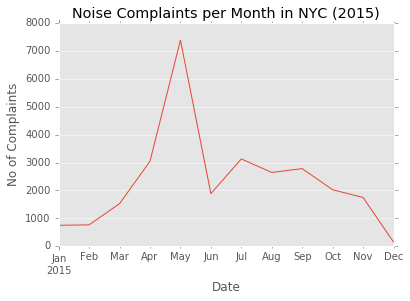

In [27]:
ax = noise_complaints.resample('M').count().plot(y='Created Date', legend=False)
ax.set_xlabel("Date")
ax.set_ylabel("No of Complaints")
ax.set_title("Noise Complaints per Month in NYC (2015)")

In [28]:
noise_complaints.groupby(by=noise_complaints.index.day).count()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_datetime
1,694,694,685,694,694,694,694,690,688,563,...,0,0,0,0,0,0,686,686,686,694
2,649,649,647,649,649,649,649,648,647,524,...,0,0,0,0,0,0,647,647,647,649
3,880,880,874,880,880,880,880,880,873,719,...,0,0,0,0,0,0,869,869,869,880
4,978,978,968,978,978,978,978,974,969,805,...,0,0,0,0,0,0,965,965,965,978
5,1165,1165,1150,1165,1165,1165,1165,1158,1156,924,...,0,0,0,0,0,0,1147,1147,1147,1165
6,1105,1105,1075,1105,1105,1105,1105,1082,1096,916,...,0,0,0,0,0,0,1090,1090,1090,1105
7,1043,1043,1029,1043,1043,1043,1043,1034,1035,862,...,0,0,0,0,0,0,1032,1032,1032,1043
8,1093,1093,1078,1093,1093,1093,1093,1082,1089,890,...,0,0,0,0,0,0,1083,1083,1083,1093
9,1087,1087,1079,1087,1087,1087,1087,1083,1083,874,...,0,0,0,0,0,0,1081,1081,1081,1087
10,1045,1045,1040,1045,1045,1045,1045,1043,1041,851,...,0,0,0,0,0,0,1036,1036,1036,1045


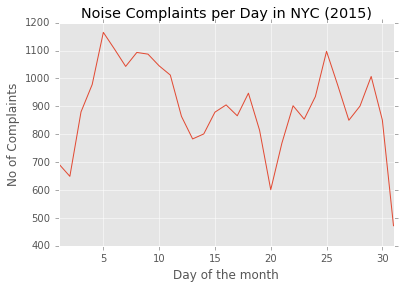

In [29]:
ax = noise_complaints.groupby(by=noise_complaints.index.day).count().plot(y='Created Date', legend=False)
ax.set_xlabel("Day of the month")
ax.set_ylabel("No of Complaints")
ax.set_title("Noise Complaints per Day in NYC (2015)")

In [30]:
len(df['2015-01-05'])

231

In [31]:
len(df['2015-02-05'])

439

In [32]:
len(df['2015-03-05'])

379

**Which were the top five days of the year for filing complaints?** How many on each of those days? Graph it.

In [33]:
df.groupby(by=df.index.day).count().sort_values('Created Date', ascending=False).head(5)
# Day of the month

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_datetime
28,8722,8722,8223,8722,8722,8722,8637,7749,7737,6555,...,63,63,75,6,5,11,7510,7510,7510,8722
9,8286,8286,7832,8286,8286,8286,8208,7651,7603,6348,...,76,76,83,10,7,10,7362,7362,7362,8286
29,7805,7805,7351,7805,7805,7805,7725,6832,6855,5697,...,48,48,65,6,0,7,6641,6641,6641,7805
5,7318,7318,6929,7318,7318,7318,7249,6478,6532,5460,...,57,57,65,3,2,7,6307,6307,6307,7318
8,7311,7311,6925,7311,7311,7311,7247,6494,6581,5539,...,82,81,86,7,3,8,6392,6392,6392,7311


In [34]:
df.resample('D').count().sort_values('Created Date', ascending=False).head(5)
# Day of the month in 2015

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_datetime
created_datetime,,,,,,,,,,,,,,,,,,,,,
2015-10-28,2697,2697,2561,2697,2697,2697,2676,2496,2476,2249,...,16,16,19,0,2,2,2435,2435,2435,2697
2015-11-09,2529,2529,2408,2529,2529,2529,2510,2328,2275,2016,...,8,8,9,1,0,1,2206,2206,2206,2529
2015-05-04,2465,2465,2394,2465,2465,2465,2447,2040,2092,1834,...,9,9,11,0,0,1,2049,2049,2049,2465
2015-05-11,2293,2293,2202,2293,2293,2293,2278,1951,1952,1708,...,18,18,21,2,1,1,1904,1904,1904,2293
2015-10-29,2258,2258,2133,2258,2258,2258,2247,2077,2062,1793,...,8,8,12,0,0,2,2013,2013,2013,2258


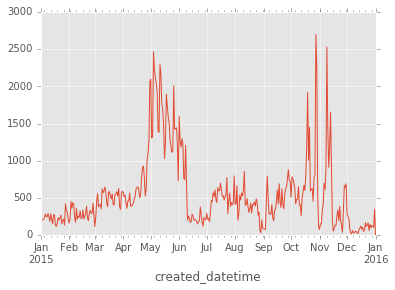

In [35]:
df.resample('D').count().plot(y='Created Date', legend=False)

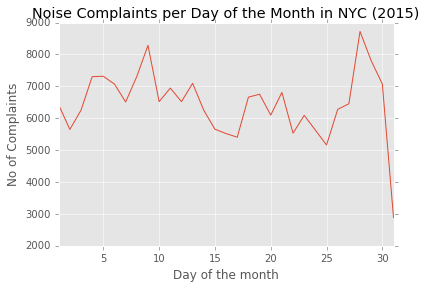

In [36]:
ax = df.groupby(by=df.index.day).count().plot(y='Created Date', legend=False)
ax.set_xlabel("Day of the month")
ax.set_ylabel("No of Complaints")
ax.set_title("Noise Complaints per Day of the Month in NYC (2015)")

**What hour of the day are the most complaints?** Graph a day of complaints.

In [37]:
df.groupby(by=df.index.hour).count().sort_values('Created Date', ascending=False)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_datetime
0,22427,22427,21874,22427,22427,22427,22397,22160,22184,21470,...,23,23,29,1,2,4,22143,22143,22143,22427
11,12729,12729,11785,12729,12729,12729,12598,10862,10883,8930,...,110,109,126,11,7,16,10376,10376,10376,12729
12,12469,12469,11591,12469,12469,12469,12341,10628,10709,8659,...,120,119,138,19,6,15,10214,10214,10214,12469
10,12343,12343,11425,12343,12343,12343,12223,10557,10604,8762,...,151,151,160,15,8,17,10128,10128,10128,12343
13,11745,11745,10912,11745,11745,11745,11627,9851,9978,8063,...,134,134,151,9,2,10,9523,9523,9523,11745
9,11490,11490,10679,11490,11490,11490,11362,9987,10076,8205,...,134,132,144,15,11,30,9662,9662,9662,11490
15,11454,11454,10645,11454,11454,11454,11340,9579,9751,7794,...,132,132,146,13,4,14,9279,9279,9279,11454
14,11205,11205,10416,11205,11205,11205,11079,9433,9511,7585,...,119,119,129,10,9,16,9042,9042,9042,11205
16,10966,10966,10264,10966,10966,10966,10879,9275,9575,7679,...,120,119,132,7,7,12,9190,9190,9190,10966
17,9291,9291,8746,9291,9291,9291,9202,8172,8408,6666,...,114,114,126,7,3,8,8101,8101,8101,9291


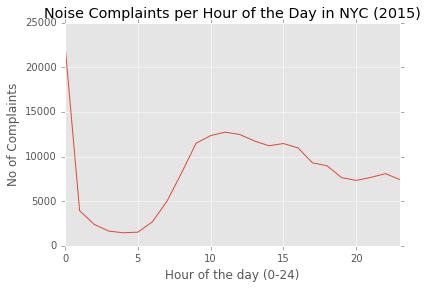

In [38]:
ax = df.groupby(by=df.index.hour).count().plot(y='Created Date', legend=False)
ax.set_xlabel("Hour of the day (0-24)")
ax.set_ylabel("No of Complaints")
ax.set_title("Noise Complaints per Hour of the Day in NYC (2015)")

One of the hours has an odd number of complaints. What are the most common complaints at that hour, and what are the most common complaints the hour before and after?

In [39]:
midnight_df = df[df.index.hour == 0]
midnight_df['Complaint Type'].value_counts().head()

HEAT/HOT WATER          4534
Rodent                  2112
PAINT/PLASTER           1946
UNSANITARY CONDITION    1820
PLUMBING                1502
Name: Complaint Type, dtype: int64

In [40]:
post_midnight_df = df[df.index.hour == 1]
post_midnight_df['Complaint Type'].value_counts().head()

Noise - Commercial         1025
Noise - Street/Sidewalk     897
Blocked Driveway            479
Illegal Parking             400
Noise - Vehicle             249
Name: Complaint Type, dtype: int64

In [41]:
pre_midnight_df = df[df.index.hour == 23]
pre_midnight_df['Complaint Type'].value_counts().head()

Noise - Street/Sidewalk    1599
Noise - Commercial         1503
Blocked Driveway            973
Illegal Parking             882
Noise - Vehicle             478
Name: Complaint Type, dtype: int64

So odd. What's the **per-minute breakdown** of complaints between 12am and 1am? You don't need to include 1am.

In [42]:
midnight_df.groupby(by=midnight_df.index.minute).count().sort_values('Complaint Type', ascending=False)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_datetime
0,17116,17116,16721,17116,17116,17116,17116,17098,17098,16983,...,0,0,0,0,0,0,17093,17093,17093,17116
50,112,112,108,112,112,112,111,108,106,96,...,2,2,2,0,0,0,106,106,106,112
1,109,109,108,109,109,109,109,105,103,90,...,0,0,0,0,0,0,102,102,102,109
21,109,109,108,109,109,109,109,101,106,96,...,0,0,0,0,0,0,103,103,103,109
40,108,108,105,108,108,108,108,101,102,96,...,0,0,0,0,0,0,101,101,101,108
4,106,106,103,106,106,106,105,101,103,93,...,1,1,1,0,0,0,103,103,103,106
6,106,106,103,106,106,106,105,101,101,90,...,2,2,2,0,0,0,101,101,101,106
7,106,106,103,106,106,106,106,101,102,90,...,1,1,2,0,0,0,102,102,102,106
39,106,106,100,106,106,106,106,102,99,88,...,0,0,0,0,0,0,98,98,98,106
22,104,104,99,104,104,104,104,98,103,91,...,0,0,1,0,0,0,101,101,101,104


Looks like midnight is a little bit of an outlier. Why might that be? Take the 5 most common agencies and graph the times they file reports at (all day, not just midnight).

In [43]:
agency_df = pd.DataFrame(df['Agency Name'])
agency_df.head()

,Agency Name
created_datetime,
2015-07-06 10:58:27,Department of Consumer Affairs
2015-07-03 13:26:29,New York City Police Department
2015-11-09 03:55:09,New York City Police Department
2015-07-03 02:18:32,New York City Police Department
2015-07-04 00:03:27,New York City Police Department


In [44]:
agency_df['Agency Name'].value_counts().head()

New York City Police Department                       80000
Department of Housing Preservation and Development    39363
Department of Transportation                          22308
Department of Parks and Recreation                    15128
Department of Health and Mental Hygiene                8216
Name: Agency Name, dtype: int64

In [45]:
nypd_df = agency_df[agency_df['Agency Name'] == 'New York City Police Department']

In [46]:
housing_df = agency_df[agency_df['Agency Name'] == 'Department of Housing Preservation and Development']

In [47]:
transportation_df = agency_df[agency_df['Agency Name'] == 'Department of Transportation']

In [48]:
parks_df = agency_df[agency_df['Agency Name'] == 'Department of Parks and Recreation']

In [49]:
health_df = agency_df[agency_df['Agency Name'] == 'Department of Health and Mental Hygiene']

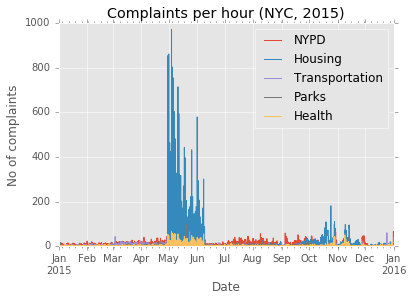

In [50]:
ax = nypd_df.resample('H').count().plot(y='Agency Name', label="NYPD")
housing_df.resample('H').count().plot(y='Agency Name', ax=ax, label="Housing")
transportation_df.resample('H').count().plot(y='Agency Name', ax=ax, label="Transportation")
parks_df.resample('H').count().plot(y='Agency Name', ax=ax, label="Parks")
health_df.resample('H').count().plot(y='Agency Name', ax=ax, label="Health")
ax.set_ylabel("No of complaints")
ax.set_xlabel("Date")
ax.set_title("Complaints per hour (NYC, 2015)")

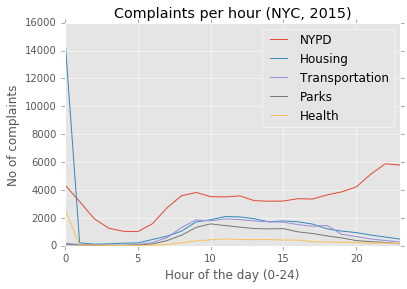

In [59]:
# I guess this is want we were supposed to do, better than the one above
ax = nypd_df.groupby(by=nypd_df.index.hour).count().plot(y='Agency Name', label='NYPD')
housing_df.groupby(by=housing_df.index.hour).count().plot(y='Agency Name', ax=ax, label="Housing")
transportation_df.groupby(by=transportation_df.index.hour).count().plot(y='Agency Name', ax=ax, label="Transportation")
parks_df.groupby(by=parks_df.index.hour).count().plot(y='Agency Name', ax=ax, label="Parks")
health_df.groupby(by=health_df.index.hour).count().plot(y='Agency Name', ax=ax, label="Health")
ax.set_ylabel("No of complaints")
ax.set_xlabel("Hour of the day (0-24)")
ax.set_title("Complaints per hour (NYC, 2015)")

Graph those same agencies on an annual basis - make it **weekly**. When do people like to complain? When does the NYPD have an odd number of complaints?

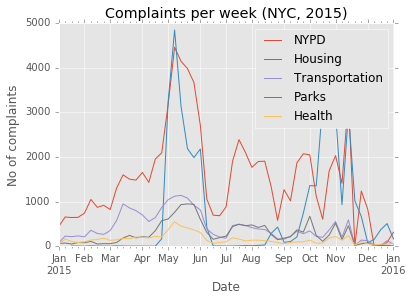

In [51]:
ax = nypd_df.resample('W').count().plot(y='Agency Name', label="NYPD")
housing_df.resample('W').count().plot(y='Agency Name', ax=ax, label="Housing")
transportation_df.resample('W').count().plot(y='Agency Name', ax=ax, label="Transportation")
parks_df.resample('W').count().plot(y='Agency Name', ax=ax, label="Parks")
health_df.resample('W').count().plot(y='Agency Name', ax=ax, label="Health")
ax.set_ylabel("No of complaints")
ax.set_xlabel("Date")
ax.set_title("Complaints per week (NYC, 2015)")

Maybe the NYPD deals with different issues at different times? Check the most popular complaints in July and August vs the month of May. Also check the most common complaints for the Housing Preservation Bureau (HPD) in winter vs. summer.

In [88]:
new_nypd_df =df[df['Agency'] == 'NYPD']

In [94]:
new_nypd_df['2015-07':'2015-08']['Complaint Type'].value_counts()

Illegal Parking              3444
Blocked Driveway             3258
Noise - Street/Sidewalk      3165
Noise - Commercial           1201
Noise - Vehicle               942
Derelict Vehicle              904
Animal Abuse                  406
Noise - Park                  331
Homeless Encampment           275
Vending                       205
Traffic                       190
Drinking                       71
Noise - House of Worship       58
Urinating in Public            42
Illegal Fireworks              24
Bike/Roller/Skate Chronic      24
Panhandling                    21
Posting Advertisement          14
Disorderly Youth                8
Graffiti                        2
Name: Complaint Type, dtype: int64

In [95]:
new_nypd_df['2015-05']['Complaint Type'].value_counts()

Blocked Driveway             4114
Illegal Parking              3975
Noise - Street/Sidewalk      3385
Noise - Commercial           2263
Noise - Vehicle              1232
Derelict Vehicle             1000
Animal Abuse                  417
Vending                       337
Traffic                       335
Homeless Encampment           264
Noise - Park                  251
Noise - House of Worship       91
Drinking                       84
Urinating in Public            36
Disorderly Youth               32
Bike/Roller/Skate Chronic      27
Panhandling                    21
Illegal Fireworks               5
Graffiti                        4
Posting Advertisement           4
Name: Complaint Type, dtype: int64

In [96]:
new_housing_df = df[df['Agency Name'] == 'Department of Housing Preservation and Development']

In [97]:
new_housing_df['2015-06':'2015-09']['Complaint Type'].value_counts()

UNSANITARY CONDITION      942
PAINT/PLASTER             718
HEAT/HOT WATER            693
PLUMBING                  545
HPD Literature Request    497
WATER LEAK                390
DOOR/WINDOW               331
GENERAL                   298
ELECTRIC                  294
FLOORING/STAIRS           240
APPLIANCE                 102
SAFETY                     82
OUTSIDE BUILDING           22
ELEVATOR                    9
Name: Complaint Type, dtype: int64

In [98]:
new_housing_df['2015-01':'2015-03']['Complaint Type'].value_counts()

UNSANITARY CONDITION    13
PAINT/PLASTER            4
WATER LEAK               3
GENERAL                  3
PLUMBING                 3
FLOORING/STAIRS          2
APPLIANCE                2
HEAT/HOT WATER           2
Name: Complaint Type, dtype: int64